In [ ]:
import os

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 

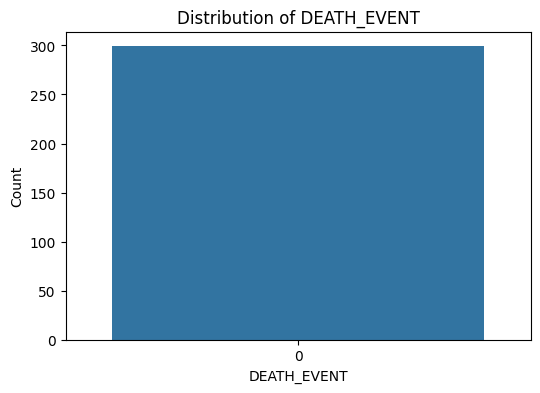

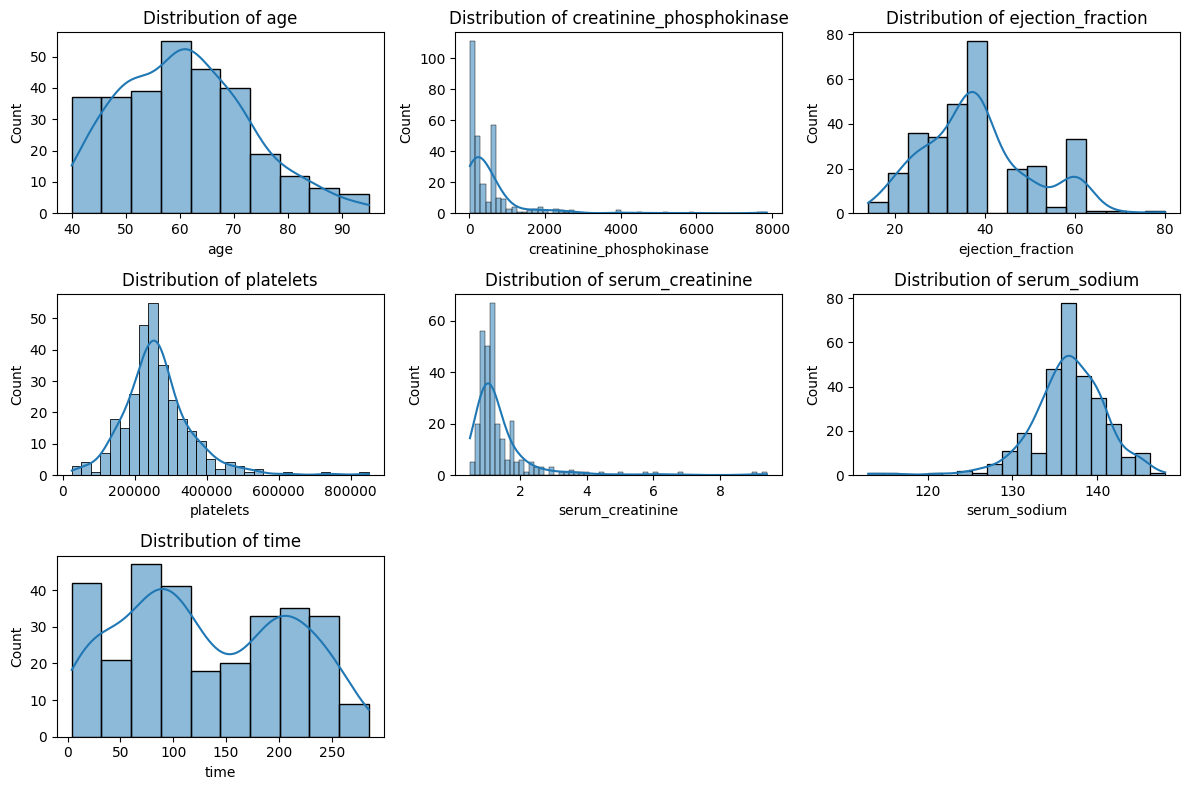

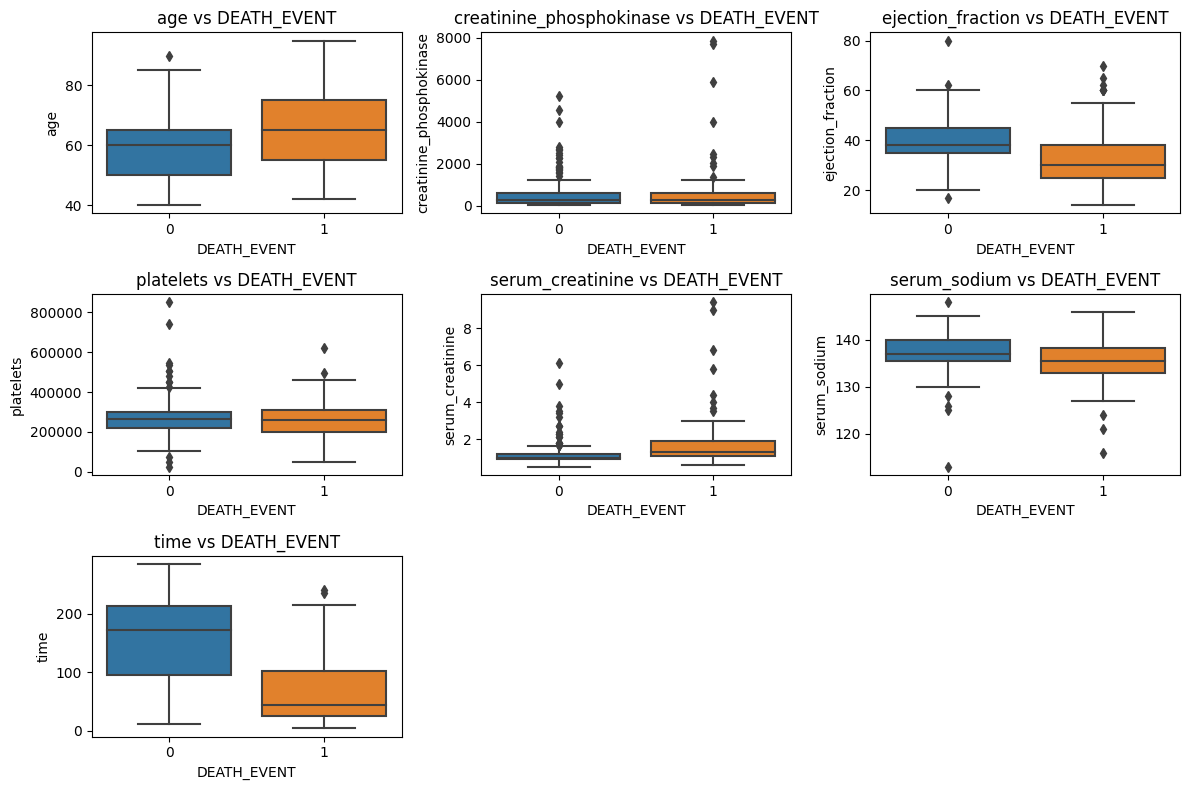

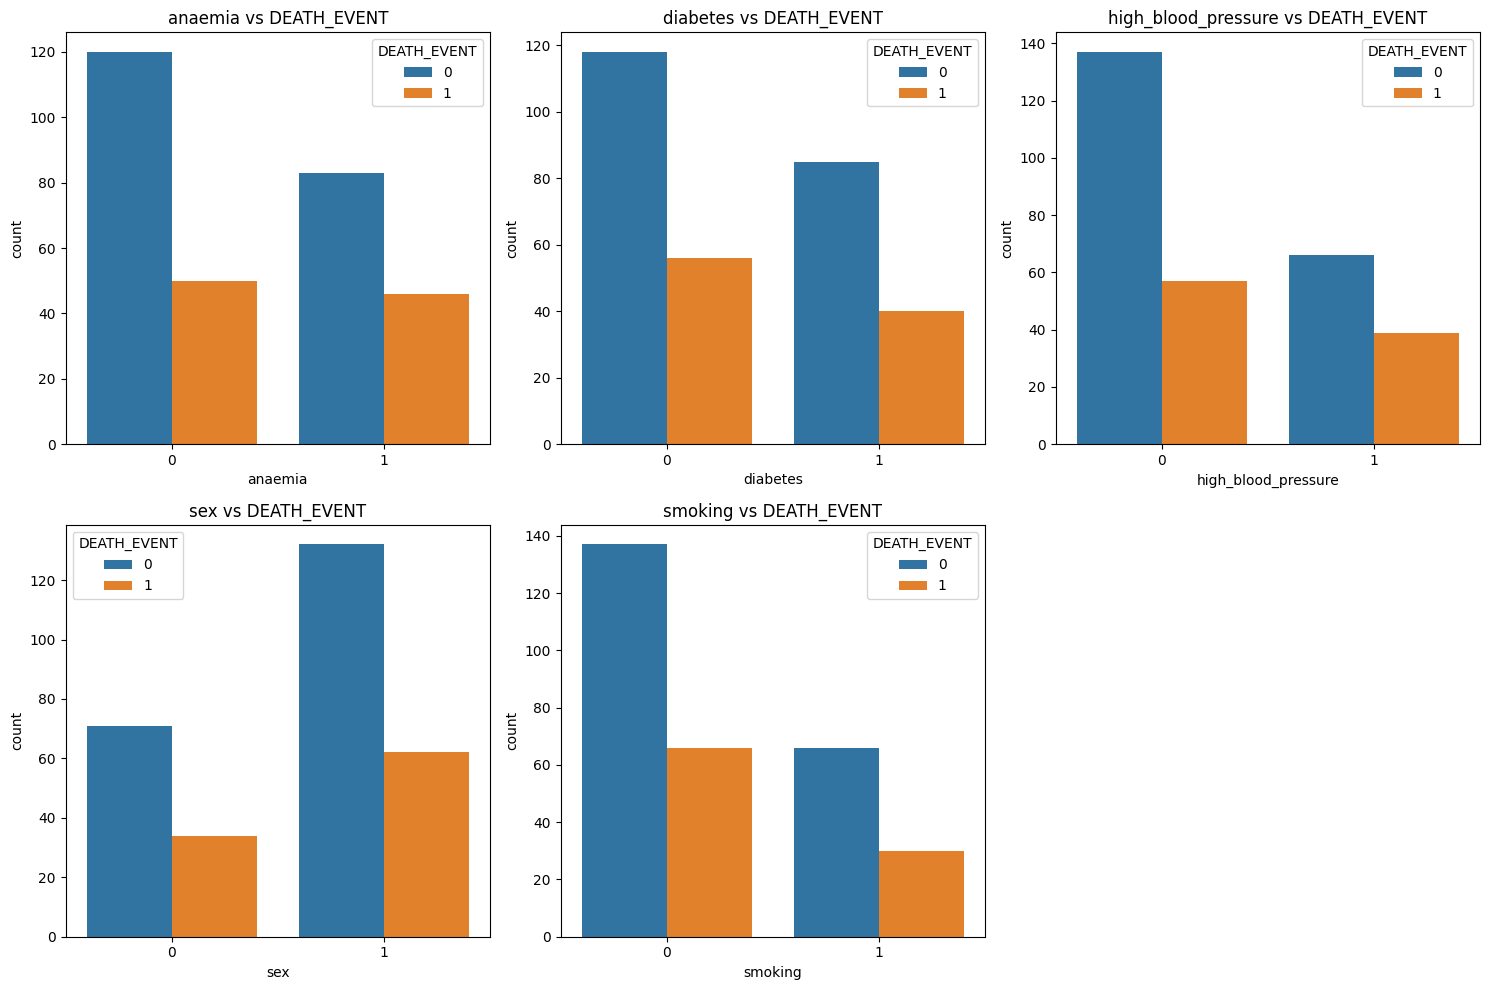

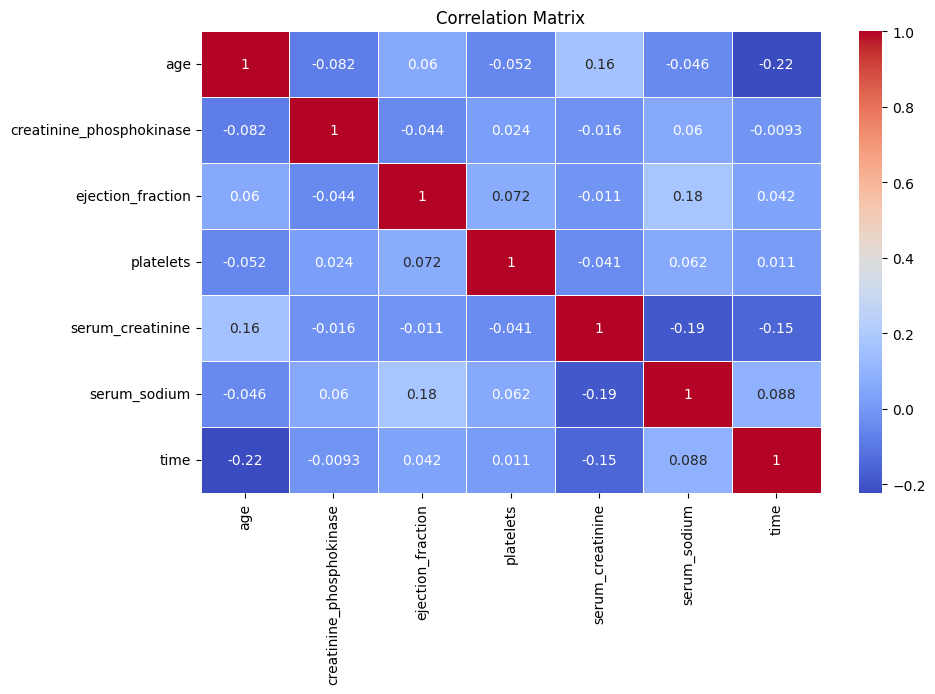

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Explore the distribution of the target variable (DEATH_EVENT)
plt.figure(figsize=(6, 4))
sns.countplot(data['DEATH_EVENT'])
plt.title("Distribution of DEATH_EVENT")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
plt.show()

# Explore the distribution of numeric features
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Explore the relationship between numeric features and DEATH_EVENT
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=data)
    plt.title(f"{feature} vs DEATH_EVENT")
plt.tight_layout()
plt.show()

# Explore the relationship between categorical features (anaemia, diabetes, high_blood_pressure, sex, smoking) and DEATH_EVENT
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='DEATH_EVENT', data=data)
    plt.title(f"{feature} vs DEATH_EVENT")
plt.tight_layout()
plt.show()

# Explore the correlation between numeric features
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv(file_path)

# Data preprocessing
# Remove any rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if needed (e.g., one-hot encoding)
# You can use pd.get_dummies() if you have categorical variables

# Split the data into features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a machine learning model (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.75
Precision: 0.8571428571428571
Recall: 0.48
F1 Score: 0.6153846153846153
Confusion Matrix:
 [[33  2]
 [13 12]]


Decision Tree Model Evaluation:
Accuracy: 0.6333333333333333
Precision: 0.5789473684210527
Recall: 0.44
F1 Score: 0.5
Confusion Matrix:
 [[27  8]
 [14 11]]


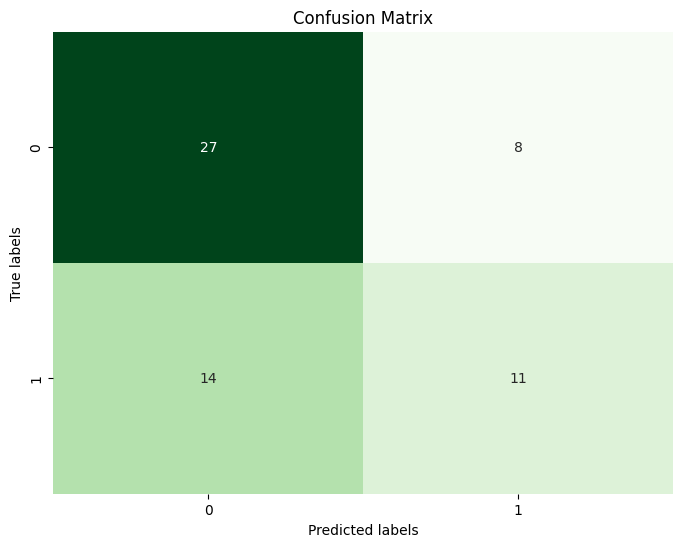

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Choose a different machine learning model (Decision Tree)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using the Decision Tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Model Evaluation for Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
cm = confusion_matrix(y_test, y_pred_decision_tree)
# Print the evaluation metrics for Decision Tree
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)
print("Confusion Matrix:\n", conf_matrix_decision_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression Model Evaluation:
Accuracy: 0.8
Precision: 0.9333333333333333
Recall: 0.56
F1 Score: 0.7000000000000001
Confusion Matrix:
 [[34  1]
 [11 14]]


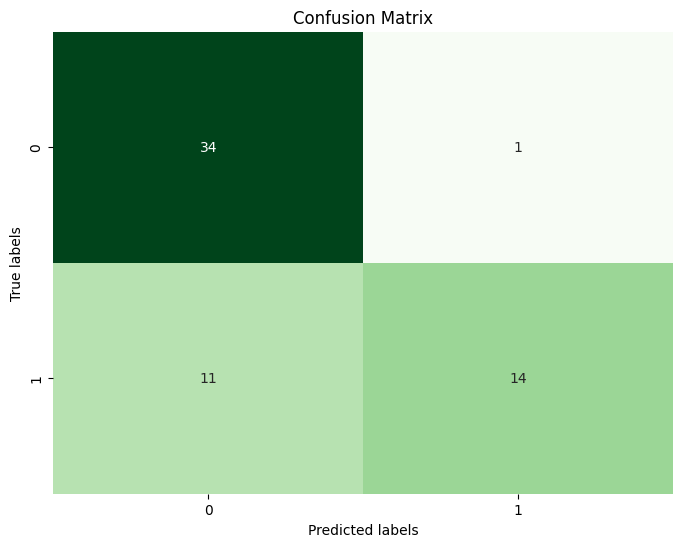

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Choose a different machine learning model (Logistic Regression)
logistic_regression_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set using the Logistic Regression model
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Model Evaluation for Logistic Regression
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
cm = confusion_matrix(y_test, y_pred_logistic_regression)
# Print the evaluation metrics for Logistic Regression
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logistic_regression)
print("Precision:", precision_logistic_regression)
print("Recall:", recall_logistic_regression)
print("F1 Score:", f1_logistic_regression)
print("Confusion Matrix:\n", conf_matrix_logistic_regression)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report for Decision Tree
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Print the classification report for Decision Tree
print("Classification Report for Decision Tree:\n", classification_report_decision_tree)

# Generate a classification report for Logistic Regression
classification_report_logistic_regression = classification_report(y_test, y_pred_logistic_regression)

# Print the classification report for Logistic Regression
print("Classification Report for Logistic Regression:\n", classification_report_logistic_regression)


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

